In [5]:
def CahoyEqn1(Rp,sep,alpha,Ag):
    Rp = Rp.to(u.km)
    sep = sep.to(u.km)
    factor1 = (np.sin(alpha) + (np.pi-alpha)*np.cos(alpha)) / np.pi
    factor2 = (Rp/sep)**2 * Ag * (2/3)
    return factor1 * factor2

<IPython.core.display.Javascript object>


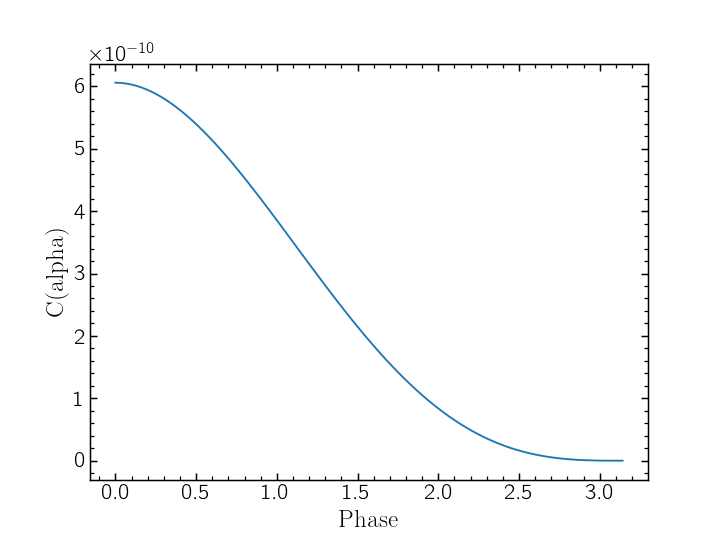

Text(0, 0.5, 'C(alpha)')

In [7]:
Rp = 1*u.Rearth
sep = 1*u.au
Ag = 0.5
phases = np.linspace(0,1,100) * np.pi

cs = [CahoyEqn1(Rp,sep,p,Ag) for p in phases]
%matplotlib notebook
plt.plot(phases,cs)
plt.xlabel('Phase')
plt.ylabel('C(alpha)')

<IPython.core.display.Javascript object>


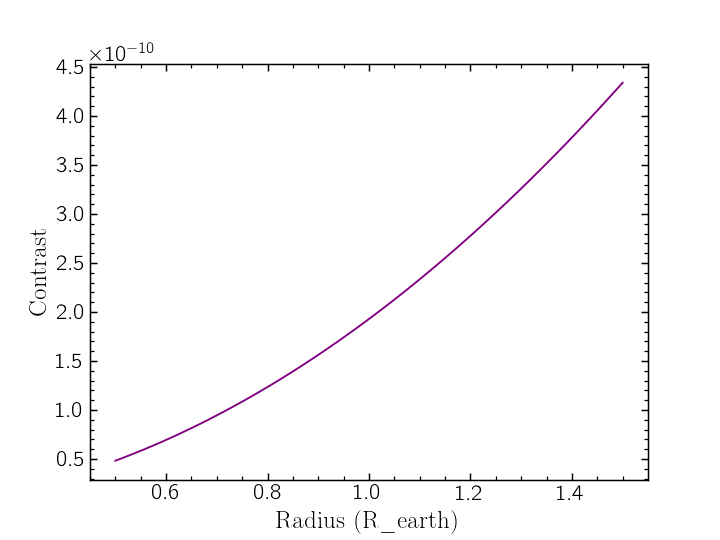

Text(0, 0.5, 'Contrast')

In [25]:
Rp = np.linspace(0.5,1.5,100)*u.Rearth
sep = 1*u.au
Ag = 0.5
phases = 0.5 * np.pi

cs = [CahoyEqn1(R,sep,phases,Ag) for R in Rp]

%matplotlib notebook
fig, ax1 = plt.subplots()
l1 = ax1.plot(Rp,cs, color='purple', label='C(Rp)')
ax1.set_xlabel('Radius (R_earth)')
plt.ylabel('Contrast')

<IPython.core.display.Javascript object>


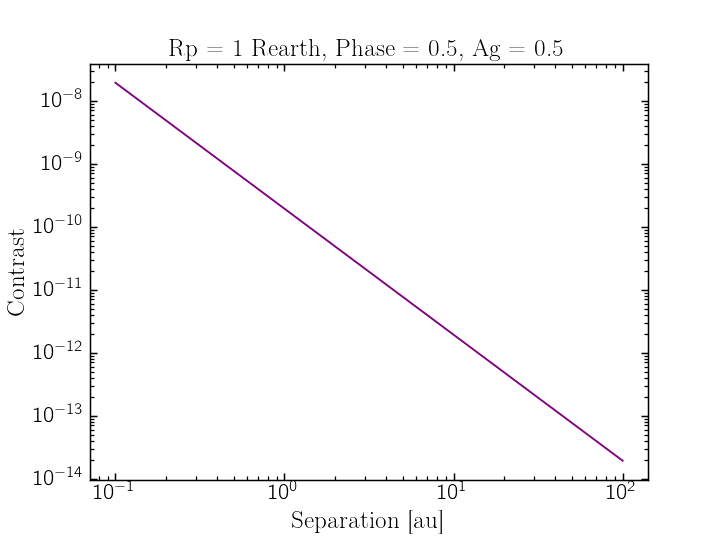

Text(0.5, 1.0, 'Rp = 1 Rearth, Phase = 0.5, Ag = 0.5')

In [35]:
Rp = 1*u.Rearth
sep = np.logspace(-1,2)*u.au
Ag = 0.5
phases = 0.5 * np.pi

cs = [CahoyEqn1(Rp,s,phases,Ag) for s in sep]

%matplotlib notebook
fig, ax1 = plt.subplots()
l1 = ax1.plot(sep,cs, color='purple', label='C(Rp)')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Separation [au]')
plt.ylabel('Contrast')
plt.title('Rp = 1 Rearth, Phase = 0.5, Ag = 0.5')

<IPython.core.display.Javascript object>


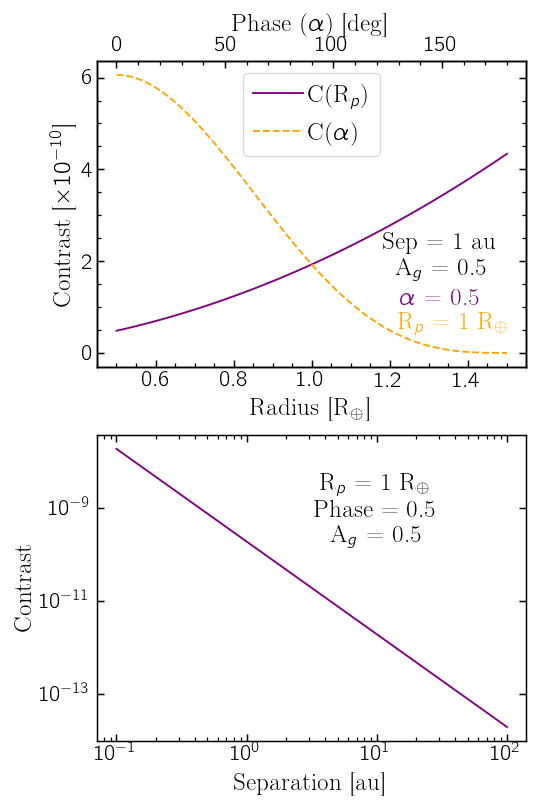

In [90]:
%matplotlib notebook
fig, axs = plt.subplots(nrows=2, ncols=1, figsize = (6, 9))


Rp = np.linspace(0.5,1.5,100)*u.Rearth
sep = 1*u.au
Ag = 0.5
phases = 0.5 * np.pi
cs = np.array([CahoyEqn1(R,sep,phases,Ag) for R in Rp])

ax1 = axs[0]
l1 = ax1.plot(Rp,cs/1e-10, color='purple', label=r'C(R$_p$)')
ax1.set_xlabel(r'Radius [R$_{\oplus}$]')
ax1.set_ylabel(r'Contrast [$\times 10^{-10}$]')
ax1.annotate('Sep = 1 au \n A$_g$ = 0.5', xy=(0.8,0.3), xycoords='axes fraction',
            fontsize=20, ha='center')
ax1.annotate(r'$\alpha$ = 0.5', xy=(0.8,0.2), xycoords='axes fraction',
            fontsize=20, ha='center', color='purple')

##########
Rp = 1*u.Rearth
sep = 1*u.au
Ag = 0.5
phases = np.linspace(0,1,100) * np.pi
cs = np.array([CahoyEqn1(Rp,sep,p,Ag) for p in phases])

ax2 = ax1.twiny()
l2 = ax2.plot(np.degrees(phases),cs/1e-10, color='orange',ls='--', label=r'C($\alpha$)')
ax2.set_xlabel(r'Phase ($\alpha$) [deg]')

lns = l1 + l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, fontsize=20, loc='upper center')
ax1.annotate(r'R$_p$ = 1 R$_{\oplus}$', xy=(0.83,0.125), xycoords='axes fraction',
            fontsize=20, ha='center', color='orange')

##########
Rp = 1*u.Rearth
sep = np.logspace(-1,2)*u.au
Ag = 0.5
phases = 0.5 * np.pi
cs = [CahoyEqn1(Rp,s,phases,Ag) for s in sep]

ax3 = axs[1]
l1 = ax3.plot(sep,cs, color='purple', label='C(Sep)')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('Separation [au]')
ax3.set_ylabel('Contrast')
ax3.annotate('R$_p$ = 1 R$_{\oplus}$ \n Phase = 0.5 \n A$_{g}$ = 0.5', xy=(0.65,0.65), 
             xycoords='axes fraction',
            fontsize=20,ha='center')
#R$_{p} = 1 R_{\oplus} \n Phase = 0.5 \n A_{g}$ = 0.5

plt.tight_layout()
plt.savefig('Refl-Light-Contrast-vs-RPS.png',bbox_inches='tight')